In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [35]:
#Open data
df1 = pd.read_csv('crx.data', header = None)
credit_card_apps = df1.rename(columns = {0: 'Gender', 1: 'Age', 2: 'Debt', 3: 'Married', 4: 'BankCustomer', 5: 'EducationLevel', 6: 'Ethnicity', 7: 'YearsEmployed', 8: 'PriorDefault', 
                                         9: 'Employed', 10: 'CreditScore', 11: 'DriversLicense', 12: 'Citizen', 13:'ZipCode', 14:'Income', 15: 'ApprovalStatus'
                                        }, inplace = False)
#Inspect data
credit_card_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [36]:
credit_card_apps.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [37]:
credit_card_apps.nunique()

Gender              3
Age               350
Debt              215
Married             4
BankCustomer        4
EducationLevel     15
Ethnicity          10
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           171
Income            240
ApprovalStatus      2
dtype: int64

In [38]:
credit_card_apps.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

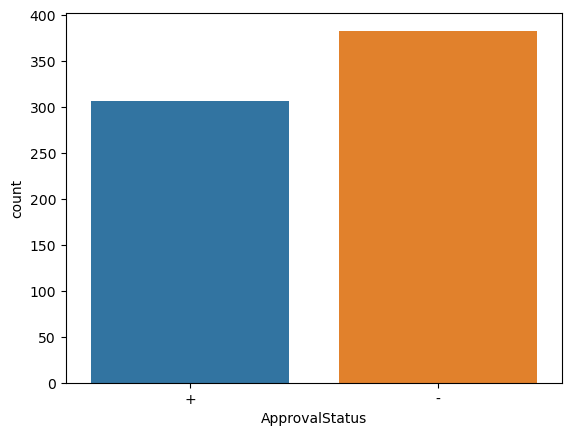

In [39]:
sns.countplot(credit_card_apps['ApprovalStatus'])
plt.show()

#As we can see here there are more (-) than (+)

-    383
+    307
Name: ApprovalStatus, dtype: int64


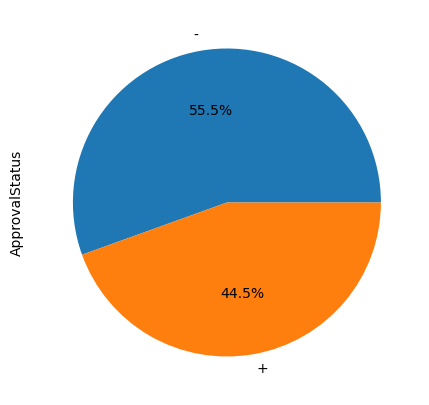

In [40]:
print(credit_card_apps['ApprovalStatus'].value_counts())
credit_card_apps['ApprovalStatus'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.show()

In [41]:
#See if there are any missing data
print(credit_card_apps['Gender'].value_counts())
print('\n')
print(credit_card_apps['Age'].value_counts())
print('\n')
print(credit_card_apps['Debt'].value_counts())
print('\n')
print(credit_card_apps['Married'].value_counts())
print('\n')
print(credit_card_apps['BankCustomer'].value_counts())
print('\n')
print(credit_card_apps['EducationLevel'].value_counts())
print('\n')
print(credit_card_apps['Ethnicity'].value_counts())
print('\n')
print(credit_card_apps['YearsEmployed'].value_counts())
print('\n')
print(credit_card_apps['PriorDefault'].value_counts())
print('\n')
print(credit_card_apps['Employed'].value_counts())
print('\n')
print(credit_card_apps['CreditScore'].value_counts())
print('\n')
print(credit_card_apps['DriversLicense'].value_counts())
print('\n')
print(credit_card_apps['Citizen'].value_counts())
print('\n')
print(credit_card_apps['ZipCode'].value_counts())
print('\n')
print(credit_card_apps['Income'].value_counts())
print('\n')
print(credit_card_apps['ApprovalStatus'].value_counts())
print('\n')

b    468
a    210
?     12
Name: Gender, dtype: int64


?        12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: Age, Length: 350, dtype: int64


1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: Debt, Length: 215, dtype: int64


u    519
y    163
?      6
l      2
Name: Married, dtype: int64


g     519
p     163
?       6
gg      2
Name: BankCustomer, dtype: int64


c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: EducationLevel, dtype: int64


v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64


0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
4.165     1
9.000     1
1.960     1
5.125     1
8.290     

In [42]:
credit_card_apps.tail(17)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [43]:
#We Inspected missing values in the dataset
#Replace the '?'s with Nan
credit_card_apps = credit_card_apps.replace('?', np.nan)
print("\n")
#Inspect the missing values again
credit_card_apps.tail(17)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [44]:
#Implement the strategy called mean imputation

credit_card_apps.fillna(credit_card_apps.mean(), inplace = True)
print(credit_card_apps.mean())
#Count the number of NaNs in the dataset to vertify 
credit_card_apps.fillna(credit_card_apps.mean(), inplace=True)
print('\n')
# Count the number of NaNs in the datasets and print the counts to verify
print(credit_card_apps.isnull().sum())
print('\n')
print("Sum of all NaN:", credit_card_apps.isnull().values.sum())

Debt                4.758725
YearsEmployed       2.223406
CreditScore         2.400000
Income           1017.385507
dtype: float64


Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64


Sum of all NaN: 67


In [45]:
#Since we have categorical data, it is best to impute these missing values with the most frequent values as present in the respective columns.
for column in credit_card_apps.columns:
    #Check if the column is of object type
    if credit_card_apps[column].dtypes == 'object':
        #Impute with the most frequent value
        credit_card_apps = credit_card_apps.fillna(credit_card_apps[column].value_counts().index[0])
        
#Count the number of NaNs in the dataset and print the counts to vertify 
print("Number of NaNs: ", credit_card_apps.isnull().values.sum())

credit_card_apps.tail(17)

Number of NaNs:  0


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
673,b,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [46]:
#We will use labelEncoder to convert all the non-numeric values into numeric ones

from sklearn.preprocessing import LabelEncoder
#Instantiate LabelEncoder
le = LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for column in credit_card_apps.columns:
    # Compare if the dtype is object
    if credit_card_apps[column].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        credit_card_apps[column]=le.fit_transform(credit_card_apps[column])
        
credit_card_apps

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,156,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,0,328,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,0,89,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,1,125,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,1,43,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,52,10.085,3,3,5,4,1.25,0,0,0,0,0,90,0,1
686,0,71,0.750,2,1,2,8,2.00,0,1,2,1,0,67,394,1
687,0,97,13.500,3,3,6,3,2.00,0,1,1,1,0,67,1,1
688,1,20,0.205,2,1,0,8,0.04,0,0,0,0,0,96,750,1


In [47]:
credit_card_apps.corr()
#From the dataset we see that DriversLicense and Zipcode have no correlation to ApprovalStatus so we can drop them

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
Gender,1.000000,0.062296,-0.041746,0.068365,0.069627,-0.012486,0.044686,0.086544,-0.026047,-0.077784,-0.024630,0.051674,0.085488,0.097600,-0.002063,0.028934
Age,0.062296,1.000000,0.135058,-0.068214,-0.085631,0.032039,-0.190155,0.386076,0.197493,0.047300,0.160599,0.079829,0.001284,-0.001211,0.016829,-0.133304
Debt,-0.041746,0.135058,1.000000,-0.047608,-0.068773,0.023428,-0.016451,0.298902,0.244317,0.174846,0.271207,-0.013023,-0.122233,-0.262772,0.123121,-0.206294
Married,0.068365,-0.068214,-0.047608,1.000000,0.942463,0.001738,0.063158,-0.048423,-0.078851,-0.114926,-0.077948,0.029057,-0.094585,-0.091238,-0.101102,0.191431
BankCustomer,0.069627,-0.085631,-0.068773,0.942463,1.000000,-0.041508,-0.003989,-0.065497,-0.129863,-0.162464,-0.106457,0.015342,-0.036095,-0.018734,-0.022904,0.187520
EducationLevel,-0.012486,0.032039,0.023428,0.001738,-0.041508,1.000000,0.038218,0.041492,0.107793,0.132133,0.012271,0.075946,-0.010663,0.070429,0.007381,-0.130026
Ethnicity,0.044686,-0.190155,-0.016451,0.063158,-0.003989,0.038218,1.000000,-0.074281,-0.002135,0.032440,-0.015461,0.020007,-0.016338,-0.064167,-0.009131,-0.000877
YearsEmployed,0.086544,0.386076,0.298902,-0.048423,-0.065497,0.041492,-0.074281,1.000000,0.345689,0.222982,0.322330,0.138139,-0.020528,-0.106919,0.051345,-0.322475
PriorDefault,-0.026047,0.197493,0.244317,-0.078851,-0.129863,0.107793,-0.002135,0.345689,1.000000,0.432032,0.379532,0.091276,-0.113623,-0.096796,0.090012,-0.720407
Employed,-0.077784,0.047300,0.174846,-0.114926,-0.162464,0.132133,0.032440,0.222982,0.432032,1.000000,0.571498,0.017043,-0.242568,-0.091529,0.077652,-0.458301


In [48]:
from sklearn.model_selection import train_test_split
#Drop the features 11 and 13 and convert the Dataframe to a Numpy array

credit_card_apps = credit_card_apps.drop(['DriversLicense','ZipCode'], axis=1)
print(credit_card_apps)
credit_card_apps = credit_card_apps.values

#Segregate features and labels into separate variables
X,y = credit_card_apps[:,0:13], credit_card_apps[:,13]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,#0.33
                                random_state=42)

     Gender  Age    Debt  Married  BankCustomer  EducationLevel  Ethnicity  \
0         1  156   0.000        2             1              13          8   
1         0  328   4.460        2             1              11          4   
2         0   89   0.500        2             1              11          4   
3         1  125   1.540        2             1              13          8   
4         1   43   5.625        2             1              13          8   
..      ...  ...     ...      ...           ...             ...        ...   
685       1   52  10.085        3             3               5          4   
686       0   71   0.750        2             1               2          8   
687       0   97  13.500        3             3               6          3   
688       1   20   0.205        2             1               0          8   
689       1  197   3.375        2             1               2          4   

     YearsEmployed  PriorDefault  Employed  CreditScore  Citize

In [33]:
X_train.shape

(462, 13)

In [49]:
y_train

array([1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1.

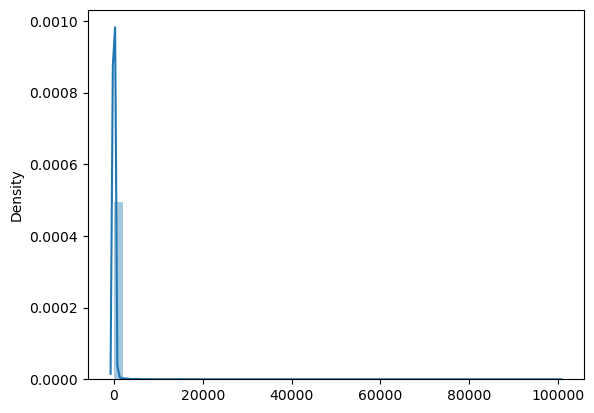

In [50]:
sns.distplot(X_train)
plt.show()

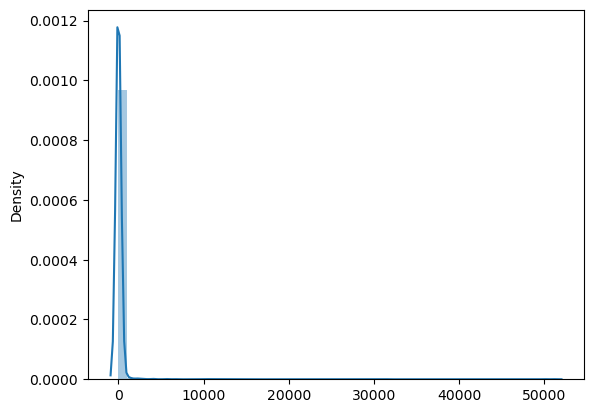

In [51]:
sns.distplot(X_test)
plt.show()

As we can see density of our testing data and traning data are skewed to the right

In [52]:
#We use Standard Scalar Transformation. Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.\
#Why we use it? Transforms the skewed data into a normal distribution it will bring mean to 0 and standard deviation to 1
#The standard scaling is sensitive towards outliers
from sklearn.preprocessing import StandardScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

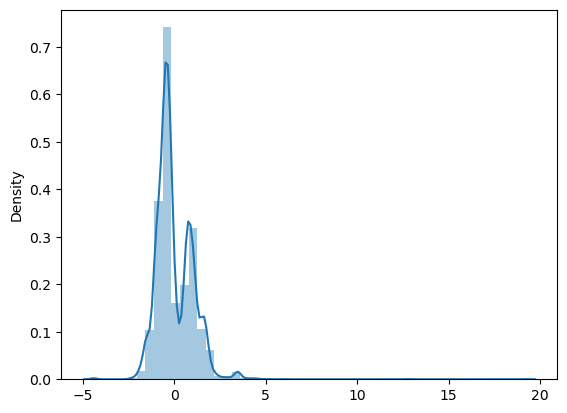

In [53]:
sns.distplot(rescaledX_train)# after the standardscaling the data is modified and the skewness is reduced
plt.show()

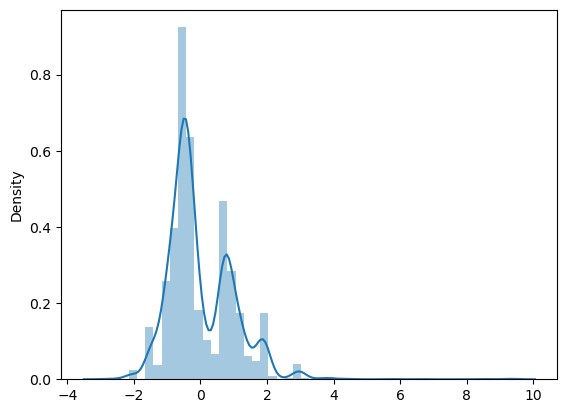

In [54]:
sns.distplot(rescaledX_test)
plt.show()

You see that after the standardscaling the data is modified and the skewness is reduced

# Logistic Regression

In [56]:
#We use Logistic Regression becuase it is is good for binary outcomes,here the outcome is approved or not approved
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(rescaledX_train,y_train)

LogisticRegression(random_state=42)

              precision    recall  f1-score   support

Not Approved       0.80      0.89      0.84       103
    Approved       0.90      0.82      0.86       125

    accuracy                           0.85       228
   macro avg       0.85      0.85      0.85       228
weighted avg       0.86      0.85      0.85       228

[[ 92  11]
 [ 23 102]]


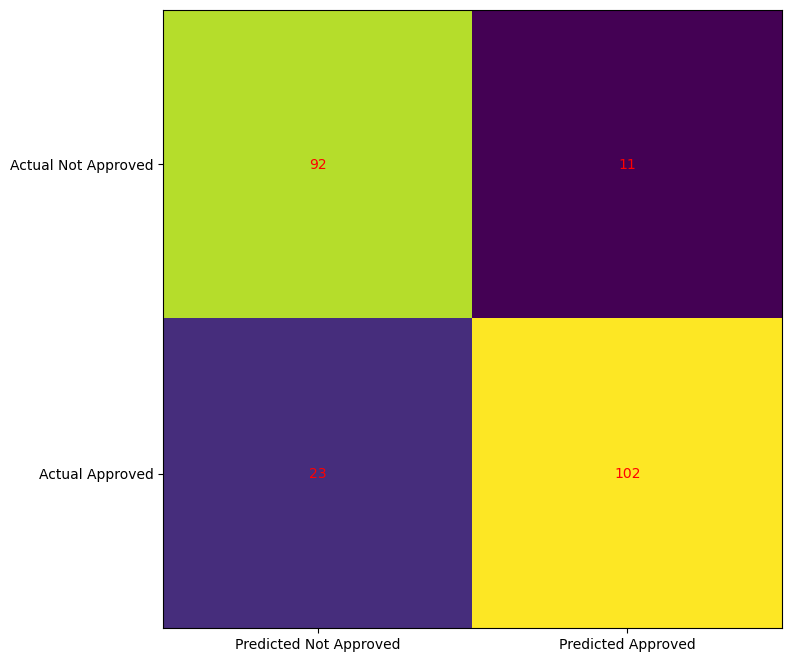

In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = logreg.predict(rescaledX_test)
cm = confusion_matrix(y_test,y_pred)
target_names = ['Not Approved', 'Approved']
print(classification_report(y_test, y_pred, target_names = target_names))
accuracy_score(y_test,y_pred)
print(cm)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Not Approved', 'Predicted Approved'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Not Approved', 'Actual Approved'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [58]:
log_acc=accuracy_score(y_test,y_pred)*100
print("Accuracy: ", log_acc)

Accuracy:  85.08771929824562


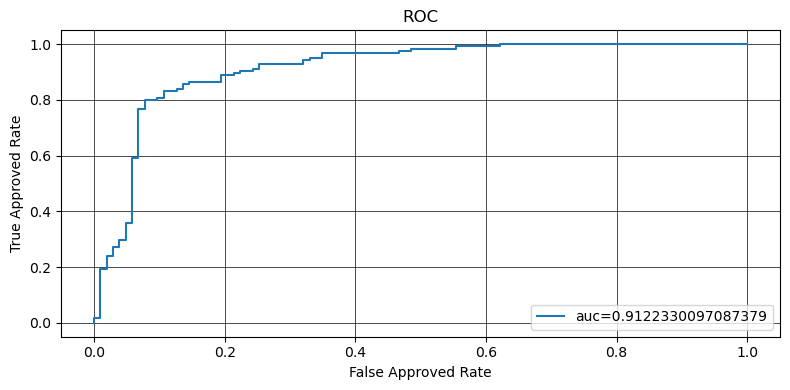

In [97]:
from sklearn import metrics
y_pred_proba = logreg.predict_proba(rescaledX_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.xlabel("False Approved Rate")
plt.ylabel("True Approved Rate")
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.title('ROC')
plt.legend(loc=4)
plt.show()

# Random Forest Classifer

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42,max_features=13)
rf.fit(rescaledX_train,y_train)
y_pred_rf = rf.predict(rescaledX_test)

              precision    recall  f1-score   support

Not Approved       0.86      0.82      0.84       103
    Approved       0.85      0.89      0.87       125

    accuracy                           0.86       228
   macro avg       0.86      0.85      0.85       228
weighted avg       0.86      0.86      0.85       228

[[ 84  19]
 [ 14 111]]


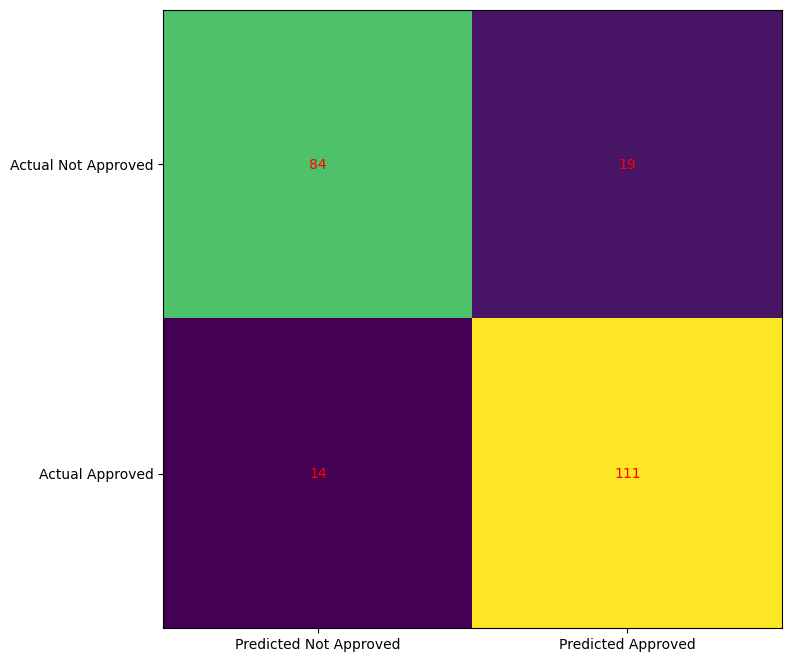

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,y_pred_rf)
target_names = ['Not Approved', 'Approved']
print(classification_report(y_test, y_pred_rf, target_names = target_names))
print(cm)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Not Approved', 'Predicted Approved'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Not Approved', 'Actual Approved'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


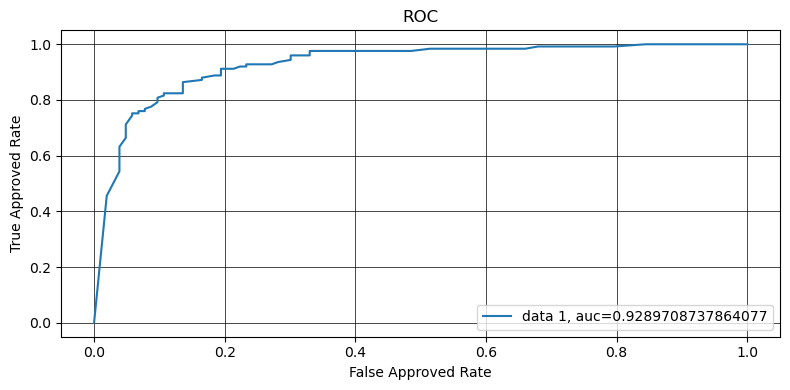

In [98]:
from sklearn import metrics
y_pred_proba = rf.predict_proba(rescaledX_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("False Approved Rate")
plt.ylabel("True Approved Rate")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.title('ROC')
plt.legend(loc=4)
plt.show()

In [61]:
rf_acc = accuracy_score(y_test,y_pred_rf)*100# it defines how much correctly the model is predicting the actual value
rf_acc

85.52631578947368

# SVM

In [62]:
from sklearn import svm
svm = svm.SVC(kernel='linear',C = 0.01)
svm.fit(rescaledX_train,y_train)
# Note: there four types of kernels : linear,rbf,poly and sigmoid the most reliable and to get best accuracy we use linear kernel
y_pred_svm = svm.predict(rescaledX_test)

              precision    recall  f1-score   support

Not Approved       0.77      0.92      0.84       103
    Approved       0.92      0.78      0.84       125

    accuracy                           0.84       228
   macro avg       0.85      0.85      0.84       228
weighted avg       0.86      0.84      0.84       228

[[95  8]
 [28 97]]


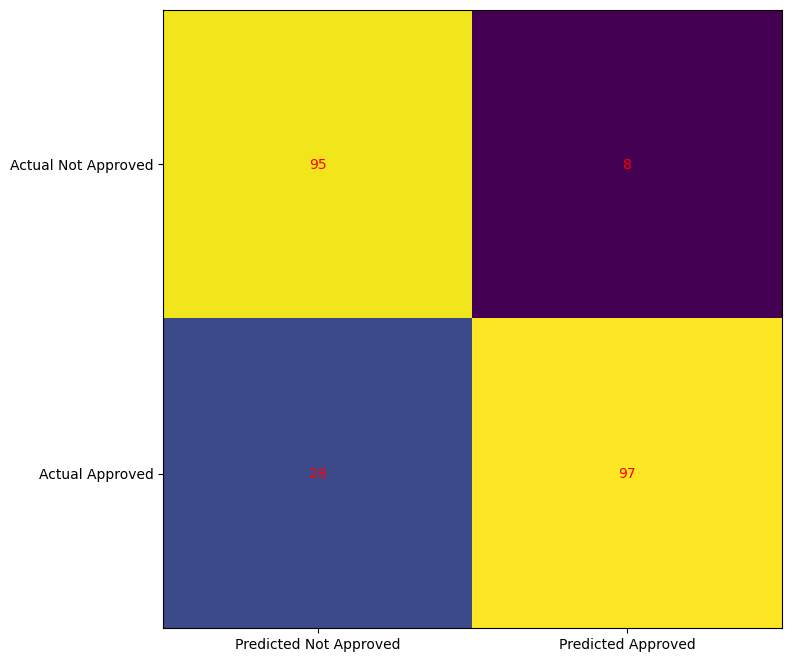

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,y_pred_svm)
target_names = ['Not Approved', 'Approved']
print(classification_report(y_test, y_pred_svm, target_names = target_names))
print(cm)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Not Approved', 'Predicted Approved'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Not Approved', 'Actual Approved'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [64]:
svm_acc = accuracy_score(y_test,y_pred_svm)*100
svm_acc

84.21052631578947

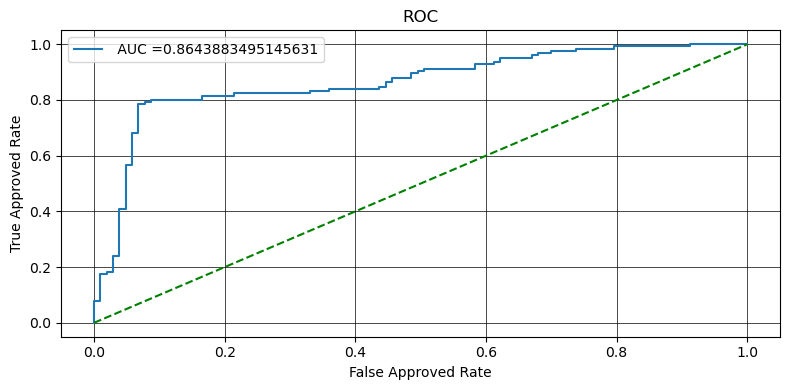

In [101]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
model = SGDClassifier(loss='hinge',alpha = 0.001,class_weight='balanced')
model.fit(rescaledX_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class, not the predicted outputs.

y_train_pred = model.decision_function(rescaledX_train)    
y_test_pred = model.decision_function(rescaledX_test) 
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Approved Rate")
plt.ylabel("True Approved Rate")
plt.title("ROC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Accuracy of Models

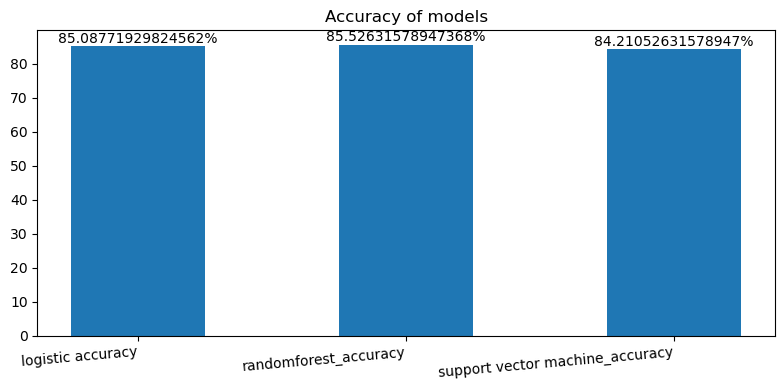

In [70]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

x=['logistic accuracy','randomforest_accuracy','support vector machine_accuracy']
y=[log_acc,rf_acc,svm_acc]

width = 0.50
fig, ax = plt.subplots()

pps = ax.bar(x, y, width, align='center')

for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+1, s="{}%".format(height), ha='center')
plt.title('Accuracy of models')
plt.xticks(rotation=5, ha='right')
plt.show()